# **Linear Regression Using Python and Scikit-learn**


Table of Contents:

1. Simple linear regression vs multiple linear regression
2. Dataset
3. Reading dataset
4. Handling categorical variables
5. Splitting data
7. Applying model



# Simple linear regression vs multiple linear regression

A. What is difference between simple linear and multiple linear regressions?

1.   Simple linear regression has only one X and one Y variable. For instance, predicting house price (Y) based on the size of the house (X) is a simple linear regression.

2.   Multiple linear regression has one Y and two or more X variables. For instance, predicting house price (Y) based on the size of the house ($X_1$), distance to the CBD ($X_2$), number of bed rooms ($X_3$), number of bathrooms ($X_4$) etc. is a multiple linear regression.






B. **Independent and dependent variables**:

1. "Xs" are called **Independent Variables**. An Independent Variable is a variable that stands alone and is unchanged by the other variables you are trying to measure.

2. "Y" is called **Dependent Variables**. A dependent variable is a variable that depends on other factors.


**Independent Variables** causes a change in **Dependent Variables** and it isn't possible that causes a change in **Dependent Variables** could cause a change in **Independent Variables**.

- For example:

> - (Time Spent Studying) causes a change in (Test Score) and it isn't possible that (Test Score) could cause a change in (Time Spent Studying).

> - We see that "Time Spent Studying" must be the **independent variable** and "Test Score" must be the **dependent variable** because the sentence doesn't make sense the other way around.

C. **Simple Linear Regression**

- If **X** is the independent variable (or independent feature) - size of the house and **Y** is the dependent variable (or dependent feature) - house price. The size of house increases then price also increases.

Equation:

$Y = aX + b$

or in this example: $price = a \times Size + b$

where, "a" is slop on that intercept and "b" is an intercept.

Slop: indicates that with the unit increases "X", then what will be the unit increases in "Y".

Intercept: indicates the value of "Y" when X = 0.



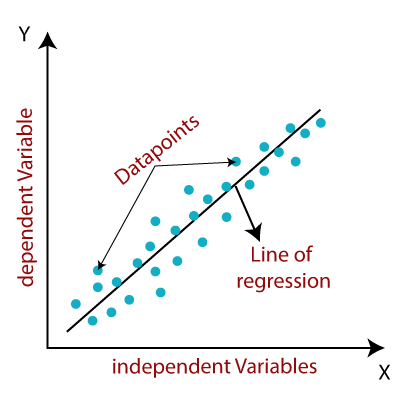
Credit: Automate Intellect – AI Blog

D. **Multiple Linear Regression**

The dependent variable "Y" depends on multiple independent variable "Xs".

E.g: The price of the house depends on many independent features, such as the size of the house, number of bed rooms, distance to the CBD, condition of the house etc.

Equation:

$Y = A_1X_1 + A_2X_2 + A_3X_3 + A_4X_4 + B$

in our example:

$Price = A_1 \times Size + A_2 \times Distance + A_3 \times Number~of~bed~rooms + A_4 \times Condition + B$

# Import Libraries

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= '0.20'

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= '2.0'

if not tf.config.list_physical_devices('GPU'):
    print('No GPU was detected. LSTMs and CNNs can be very slow without a GPU.')
    if IS_COLAB:
        print('Go to Runtime > Change runtime and select a GPU hardware accelerator.')

# Common imports
import os
import shutil
import itertools
import glob
import string
import pickle

import numpy as np
import matplotlib.image as mpimg
import pandas as pd

from tqdm import tqdm
from time import time
from PIL import Image
from datetime import date


# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

No GPU was detected. LSTMs and CNNs can be very slow without a GPU.
Go to Runtime > Change runtime and select a GPU hardware accelerator.


# 2. Connect to Google Drive

In [2]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Mounted at /content/gdrive
gdrive	sample_data


In [ ]:
# %cd /content/gdrive/My Drive/
%cd /content/gdrive/My Drive/Colab Notebooks/MachineLearning/
!ls

In [5]:
! pwd

/content/gdrive/My Drive/Colab Notebooks/MachineLearning


# Paths to Data Directories

In [6]:
PROJECT_PATH = '/content/gdrive/My Drive/Colab Notebooks/MachineLearning'
DATA_PATH    = os.path.join( PROJECT_PATH, 'data' )

# Load data

## Training data

In [7]:
pd.set_option('display.max_columns', None)

In [22]:
data_file = os.path.join(DATA_PATH, 'AgesAndHeights.pkl')
df = pd.read_pickle(data_file)
# ages = data['Age']
# data = data[ages > 0]
# ages = data['Age'].tolist()
# heights = data['Height'].tolist()

In [23]:
df.head(4)

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660


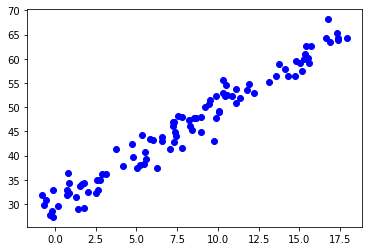

In [24]:
plt.plot(df['Age'], df['Height'], 'bo')
plt.show()

In [25]:
# Number of rows and columns (rows, cols)
df.shape

(100, 2)

In [26]:
# Print feature names
df.columns

Index(['Age', 'Height'], dtype='object')

In [27]:
# Type of each column
df.dtypes

Age       float64
Height    float64
dtype: object

# 5. Data Wrangling

1. Since data is in form of excel file we have to use pandas read_excel to load the data.

2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row

3. Check whether any null values are there or not. if it is present then following can be done:



> a. Imputing data using Imputation method in sklearn


> b. Filling NaN values with mean, median and mode using fillna() method

4. Describe data --> which can give statistical analysis

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     100 non-null    float64
 1   Height  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


Unique values of categorical features

In [30]:
print("Age: ", df.Age.unique())
print("No. of Airlines: ", len(df.Age.unique()) )
print()
df.Age.value_counts()

Age:  [14.76787382  3.10767135  7.26691701  1.81517968 16.75375763  5.35126307
  8.65571488  4.20599293  7.35669106  1.66817819  8.2969588  14.74948482
 15.28545214 -0.16353169 16.65534197  0.85918789  8.43332999 11.92386163
  0.76828323 11.36202254 -0.68301696  1.29597926 10.31206094 17.39335272
 10.31003056 -0.14639168  6.23764582 15.55153122  2.77346425 15.59798962
 -0.78085287  7.57789784  2.04165705  9.90665221  2.87252515  1.54231936
 -0.08795844  5.46202264 15.04362695  5.99372597  4.805291    8.94992003
  5.02020985  9.89555258  5.20281507  0.19568558  0.89217393  7.30979593
 10.8545723  15.69876495  0.81216582 15.40144747  9.21599924  8.98515379
  3.74369906  0.75192511  6.5963469   9.75112683  7.40094567 -0.5484884
 17.32712575 10.53406938 15.16816596  9.46971876 13.54691548  7.80132294
  2.51910344  4.71666526 10.0386595  11.77125476  8.53738026  2.58355771
  1.438003   10.40642157 16.85933332 12.22465149  9.51476997 10.08186587
  8.19621527 10.49687113  7.27368593 11.129608

15.698765    1
15.401447    1
9.906652     1
10.854572    1
8.949920     1
            ..
0.812166     1
0.751925     1
5.519293     1
1.815180     1
17.343121    1
Name: Age, Length: 100, dtype: int64

In [31]:
print("Height: ", df.Height.unique())
print("No. of Height: ", len(df.Height.unique()) )
print()
df.Height.value_counts()

Height:  [59.62748426 36.14645274 46.91287846 29.12565975 68.1704139  44.34636503
 47.71361295 37.82994409 44.79306512 34.05901466 46.14234545 56.45678228
 59.87003819 28.6478337  64.23638736 34.24599643 45.29759191 54.75189183
 32.93518571 51.99837    29.88392844 31.52350033 55.70481247 63.86109721
 52.9199051  32.83092177 37.36102444 60.23327195 35.01026126 59.12701931
 31.96080741 48.21846885 32.56232215 47.75274969 36.24179872 33.78175852
 27.33251348 38.2877098  59.10262494 43.28700254 39.66542429 44.95296111
 37.43903005 52.31971537 38.09928941 29.50846768 32.17702291 42.91083707
 52.33957205 62.64153739 36.34620991 62.68458017 50.12874248 48.01159919
 41.30798526 31.82734682 43.07902442 43.03917945 44.13595398 30.80134635
 65.38850138 52.55874397 57.54336087 50.73552242 56.35839211 41.5764792
 32.30251117 42.33202065 49.22075916 53.45369077 47.80362461 34.93143275
 29.00769567 52.33693502 63.38905063 52.92067293 51.44539695 48.99409356
 47.33274976 54.52644907 46.21415637 50.948

34.931433    1
37.829944    1
29.508468    1
31.523500    1
29.883928    1
            ..
47.332750    1
36.146453    1
54.526449    1
52.920673    1
36.346210    1
Name: Height, Length: 100, dtype: int64

Check NULL values

In [32]:
df.isnull().sum() # No NULL values

Age       0
Height    0
dtype: int64

In [33]:
# Drop NAN/NULL values
df.dropna(inplace=True)

In [35]:
df.shape

(100, 2)

In [36]:
# Some statistics of Age
df[['Age']].describe()

,Age
count,100.000000
mean,7.966138
std,5.321621
min,-0.780853
25%,3.048885
50%,7.795597
75%,11.464331
max,17.887852


In [37]:
# Some statistics of Height
df[['Height']].describe()

,Height
count,100.000000
mean,45.955674
std,10.787318
min,27.332513
25%,36.320107
50%,46.178251
75%,53.994166
max,68.170414


# Height vs Age

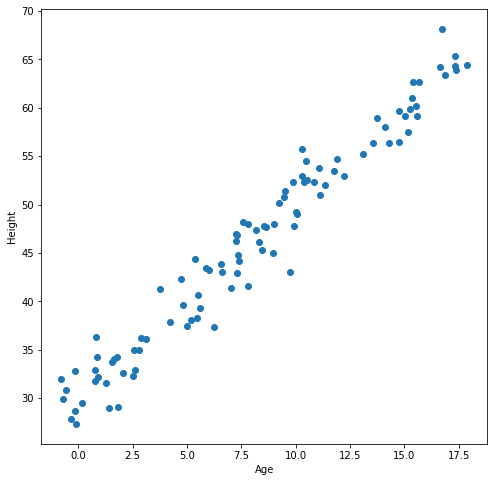

In [42]:
plt.figure(figsize=(8,8))
plt.scatter(df['Age'], df['Height'])
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

# Train the model using Linear Regression

Split dataset into training and test sets (Xtrain, Xtest).
1. Need to scale the data? Scaling is not necessary in this Simple Linear Reagression.
2. Import model
3. Fit the data
4. Predict using Xtest
5. In regression check RSME Score
6. Plot graph

In [51]:
X = df['Age'].to_numpy()
y = df['Height'].to_numpy()

X = X.reshape(-1, 1)

print(X.shape)
print(y.shape)

(100, 1)
(100,)


In [52]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [53]:
# importing module
from sklearn.linear_model import LinearRegression

# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
# Prediction
pred = LR.predict(Xtest)

In [58]:
# The coefficient of determination (𝑅^2) with .score()...
# R-squared) is a statistical measure that 
# represents the proportion of the variance for 
# a dependent variable that's explained by 
# an independent variable or variables in a regression model. 
print('Score:')
LR.score(Xtest, ytest)

Score:


0.9354873390547741

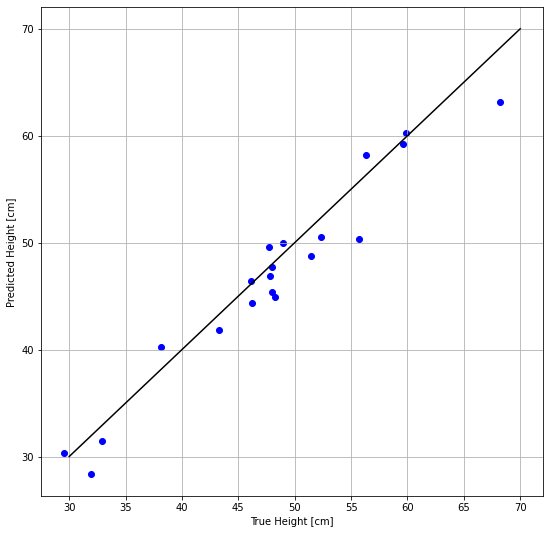

In [63]:
plt.figure(figsize=(9,9))
plt.scatter(ytest, pred, marker='o', color='b')
plt.plot([30., 70.], [30., 70.], 'k-')
plt.xlabel('True Height [cm]')
plt.ylabel('Predicted Height [cm]')
plt.grid()
plt.show()

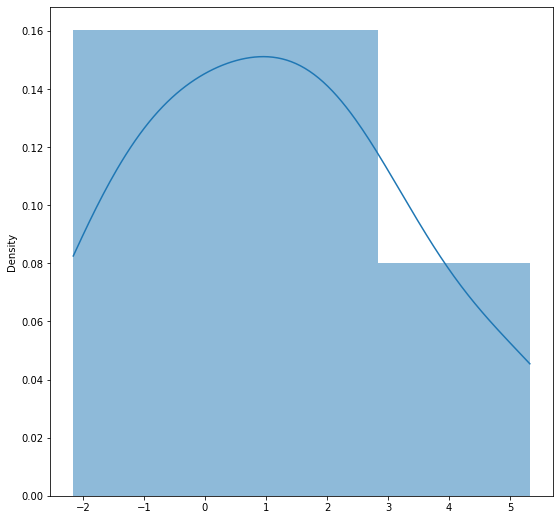

In [64]:
plt.figure(figsize=(9,9))
sns.histplot(ytest - pred, kde=True, stat="density", linewidth=0)
plt.show()

The difference is close to 0. The model has done a pretty good job.

In [66]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(ytest, pred))
print('MSE:', metrics.mean_squared_error(ytest, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, pred)))

MAE: 1.940465368274285
MSE: 5.796764225115498
RMSE: 2.4076470308405877


In [68]:
# RMSE/(max(DV)-min(DV))
np.sqrt(metrics.mean_squared_error(ytest, pred))/(max(y)-min(y))

0.0589561903508531

The MSE is ~6% of the whole height range (Min -> Max).

In [69]:
# R^2
# The most common interpretation of r-squared is how well the regression model fits the observed data.
# For example, an r-squared of 60% reveals that 60% of the data fit the regression model.
# Generally, a higher r-squared indicates a better fit for the model.
metrics.r2_score(ytest, pred)

0.9354873390547741

# Save the model

In [70]:
# open a file
xfile = open( os.path.join(DATA_PATH, 'LinReg_Age_Height.pkl'), 'wb')

# dump to file
pickle.dump(LR, xfile)

In [71]:
# open a file
xfile = open( os.path.join(DATA_PATH, 'LinReg_Age_Height.pkl'), 'rb')
linreg = pickle.load(xfile)

In [72]:
y_prediction = linreg.predict(Xtest)

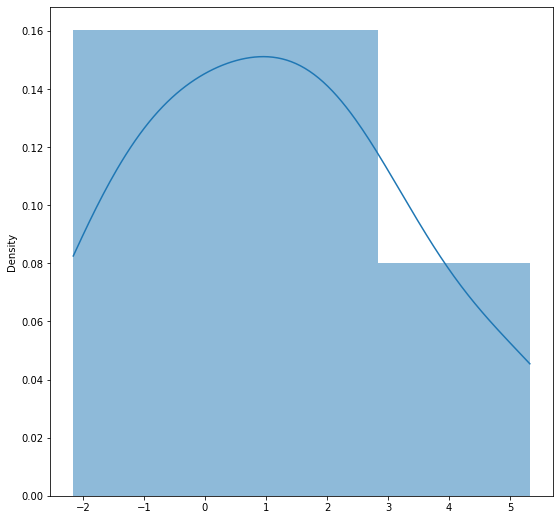

In [73]:
plt.figure(figsize=(9,9))
sns.histplot(ytest - y_prediction, kde=True, stat="density", linewidth=0)
plt.show()

In [ ]:
# Display all dependencies and their versions
!pip freeze